Gross Sales Clustering by Store ZIP

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [6]:
# Load Dataset
file_path = "train.csv"  # Change to "train.csv" if using CSV format
df = pd.read_csv(file_path)  # Use read_csv() if it's CSV

In [7]:
# Fix ZIP Code Formatting
df["STORE_ZIP"] = df["STORE_ZIP"].astype(str).str.zfill(5)  # Ensure 5-digit ZIP codes
df["STORE_ZIP"] = df["STORE_ZIP"].str.extract(r'(\d{5})')  # Extract valid ZIP codes
df["STORE_ZIP"] = pd.to_numeric(df["STORE_ZIP"], errors='coerce')  # Convert to numeric
df = df.dropna()  # Remove any NaN values


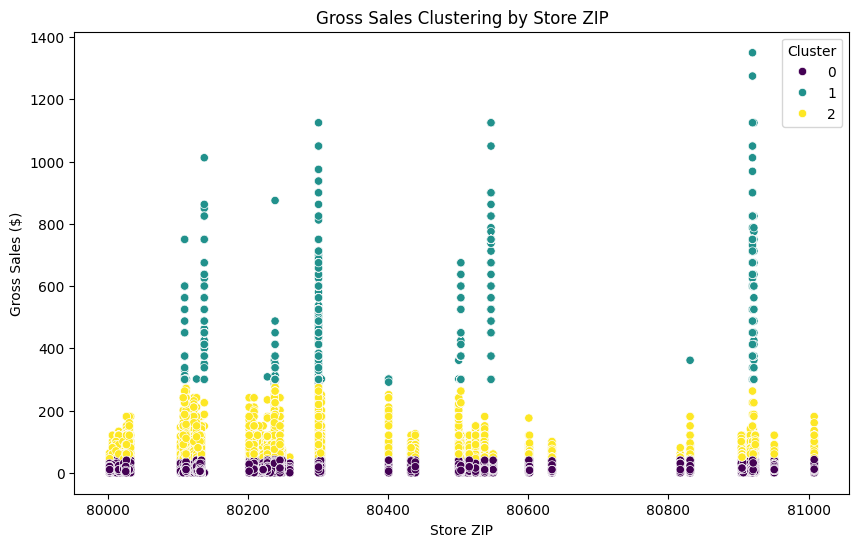

In [8]:
# Select Relevant Column (Gross Sales)
df_cluster = df[["STORE_ZIP", "GROSS_DOLLARS"]].dropna()

# Standardize Data (To prevent scaling bias)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[["GROSS_DOLLARS"]])

# Apply K-Means Clustering with a Fixed K (No Elbow Method)
k = 3  # Change this number if needed
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Create Scatter Plot for Gross Sales Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster["STORE_ZIP"], y=df_cluster["GROSS_DOLLARS"], hue=df_cluster["Cluster"], palette='viridis')

# Plot Settings
plt.xlabel("Store ZIP")
plt.ylabel("Gross Sales ($)")
plt.title("Gross Sales Clustering by Store ZIP")
plt.legend(title="Cluster")

# Display the plot
plt.show()


Net Sales Clustering by Store Zip

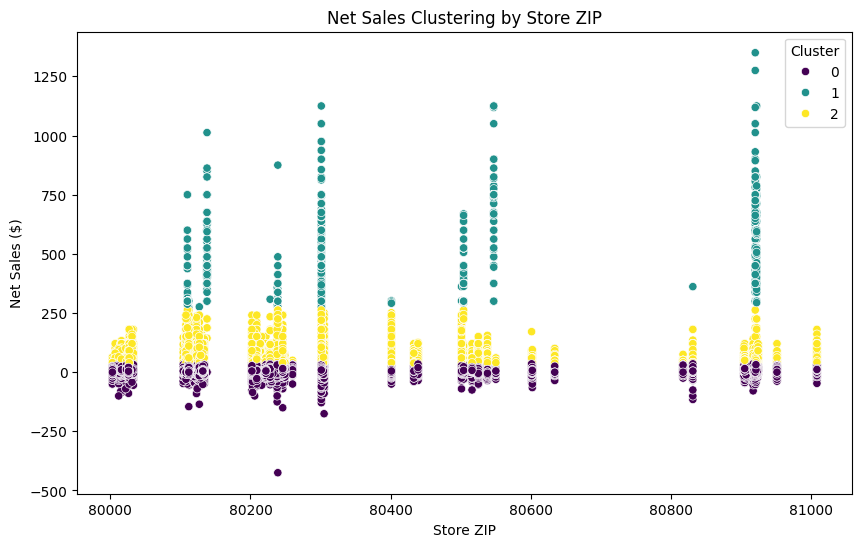

In [4]:
# Select Relevant Column (Net Sales)
df_cluster = df[["STORE_ZIP", "NET_AFTER_RETURN_DOLLARS"]].dropna()

# Standardize Data (To prevent scaling bias)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[["NET_AFTER_RETURN_DOLLARS"]])

# Apply K-Means Clustering with a Fixed K (No Elbow Method)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Create Scatter Plot for Net Sales Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster["STORE_ZIP"], y=df_cluster["NET_AFTER_RETURN_DOLLARS"], hue=df_cluster["Cluster"], palette='viridis')

# Plot Settings
plt.xlabel("Store ZIP")
plt.ylabel("Net Sales ($)")
plt.title("Net Sales Clustering by Store ZIP")
plt.legend(title="Cluster")

# Display the plot
plt.show()
